# How to select a mesh subset?

This notebook shows how to select a subset of a mesh that is encoded by a color.

In [1]:
import pyvista as pv

import polpo.preprocessing.dict as ppdict
import polpo.utils as putils
from polpo.preprocessing import Map
from polpo.preprocessing.load.pregnancy.pilot import (
    HippocampalSubfieldsSegmentationsLoader,
)
from polpo.preprocessing.mesh.conversion import PvFromData
from polpo.preprocessing.mri import (
    ASHS_STRUCTS,
    MeshExtractorFromSegmentedImage,
    MeshExtractorFromSegmentedMesh,
)

[KeOps] Warning : cuda was detected, but driver API could not be initialized. Switching to cpu only.


In [2]:
STATIC_VIZ = True

if STATIC_VIZ:
    pv.set_jupyter_backend("static")

## Mesh from MRI

Following [How to get a mesh from an MRI image?](mri2mesh.ipynb), we get a `pv.PolyData` object representing the hippocampus.

In [3]:
SESSION_ID = 1

In [4]:
path2image = (
    HippocampalSubfieldsSegmentationsLoader(subset=[SESSION_ID], as_image=True)
    + ppdict.ExtractUniqueKey()
)

img2mesh = MeshExtractorFromSegmentedImage(encoding="ashs") + PvFromData()

In [5]:
img = path2image()

mesh = img2mesh(img)

INFO: Data has already been downloaded... using cached file ('/home/luisfpereira/.herbrain/data/pregnancy/derivatives/segmentations').


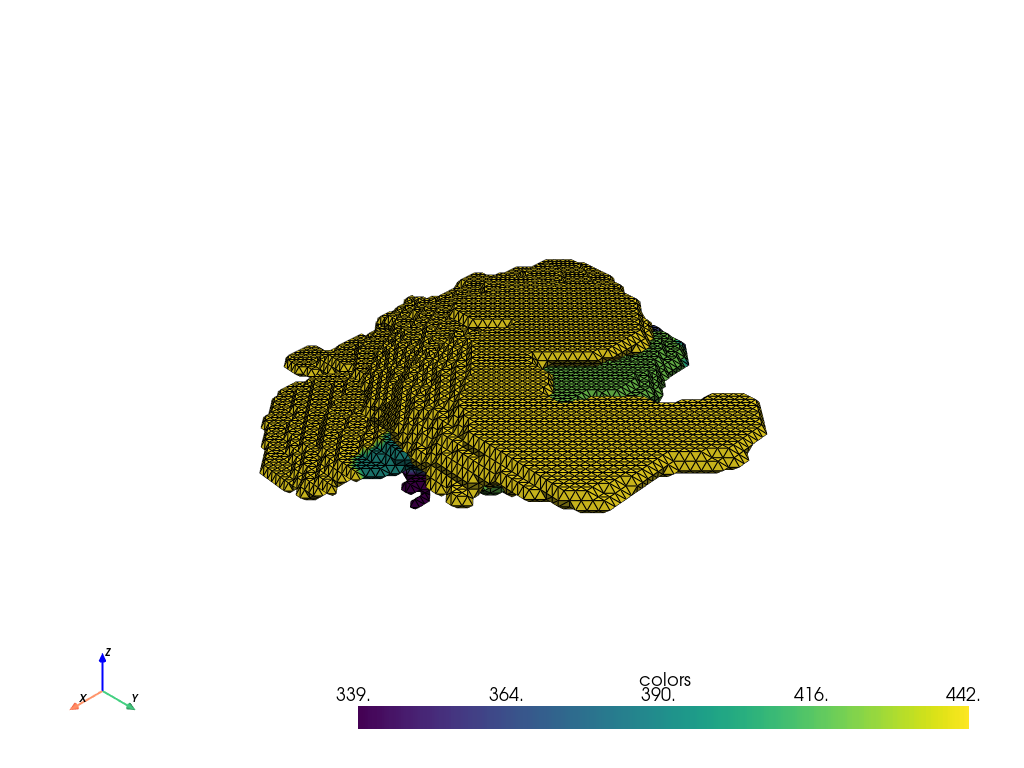

In [6]:
pl = pv.Plotter(border=False)

pl.show_axes()
pl.add_mesh(mesh, show_edges=True)
pl.show()

## Select a substructure (from a segmented mesh)

Substructures are encoded by colors. In this particular case, the encoding is generated by [ASHS](https://www.nitrc.org/projects/ashs).

We now create a preprocessing step that selects the cells of the mesh with the given color.

In [7]:
mesh2struct_mesh = MeshExtractorFromSegmentedMesh(mesh=mesh)

meshes = ppdict.HashWithIncoming(
    Map(mesh2struct_mesh), key_sorter=sorted(ASHS_STRUCTS)
)(ASHS_STRUCTS)

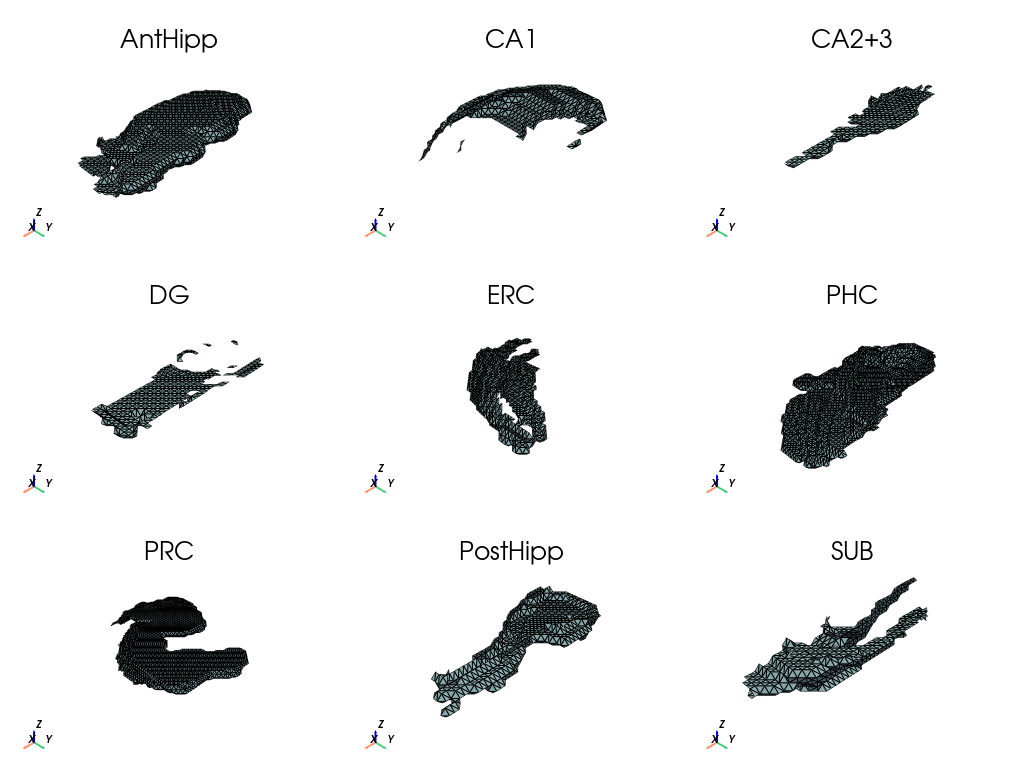

In [8]:
n_cols = 3
pl = pv.Plotter(shape=(3, n_cols), border=False)

for index, (struct_name, substructure) in enumerate(meshes.items()):
    row, col = putils.plot_index_to_shape(index, n_cols)
    pl.subplot(row, col)

    pl.show_axes()
    substructure.clear_data()
    pl.add_mesh(substructure, show_edges=True)
    pl.add_title(struct_name, font_size=10)

pl.show()

Any mesh preprocessing step can now be applied to each substructure.

## Select a substructure (from a segmented image)

If the original mesh comes from a segmented image, a substructure can also be directly extracted from the image, as shown [here](./mri2mesh.ipynb).

In [9]:
img2mesh = (
    MeshExtractorFromSegmentedImage(
        image=img,
        return_colors=False,
        encoding="ashs",
    )
    + PvFromData()
)

meshes = ppdict.HashWithIncoming(Map(img2mesh), key_sorter=sorted(ASHS_STRUCTS))(
    ASHS_STRUCTS
)

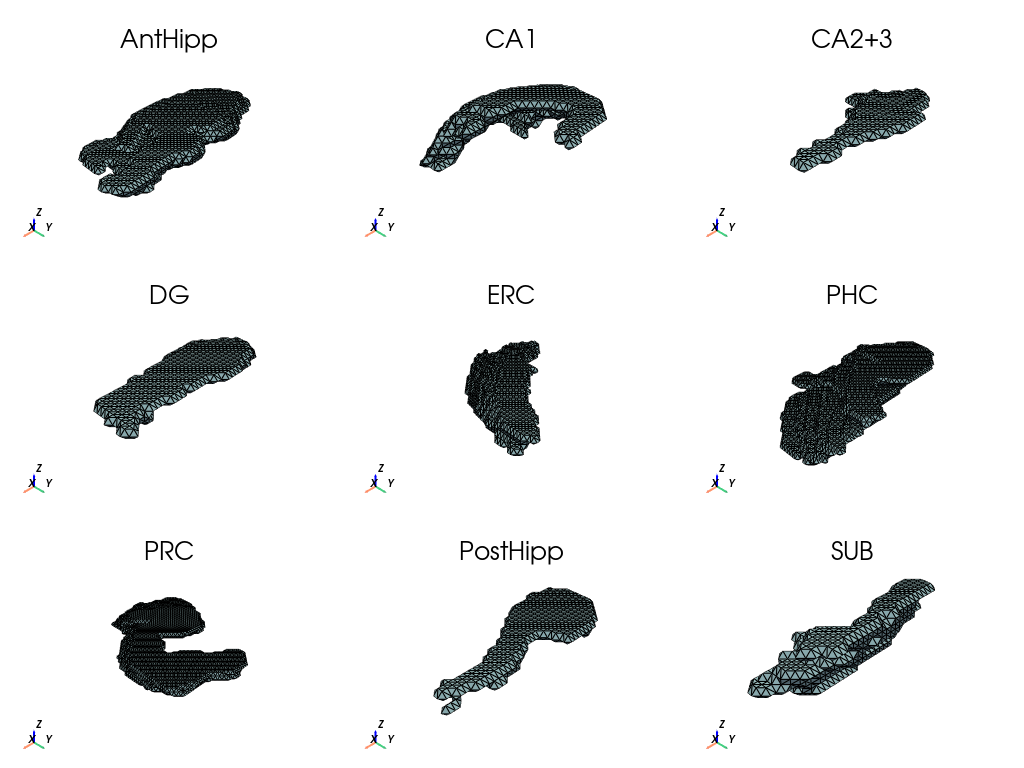

In [10]:
n_cols = 3
pl = pv.Plotter(shape=(3, n_cols), border=False)

for index, (struct_name, substructure) in enumerate(meshes.items()):
    row, col = putils.plot_index_to_shape(index, n_cols)
    pl.subplot(row, col)

    pl.show_axes()
    substructure.clear_data()
    pl.add_mesh(substructure, show_edges=True)
    pl.add_title(struct_name, font_size=10)

pl.show()